Step 1: Import Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler


Step 2: Generate the Datasets

In [2]:
# Generate datasets
n_samples = 300  # Number of data points

# Dataset 1: Two interleaving half-moons
X_moons, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=42)

# Dataset 2: Blobs with varying densities
X_blobs, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Dataset 3: Concentric circles
X_circles, _ = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=42)

# Standardizing datasets (DBSCAN is sensitive to scale)
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_blobs = scaler.fit_transform(X_blobs)
X_circles = scaler.fit_transform(X_circles)


Step 3: Visualizing the Datasets

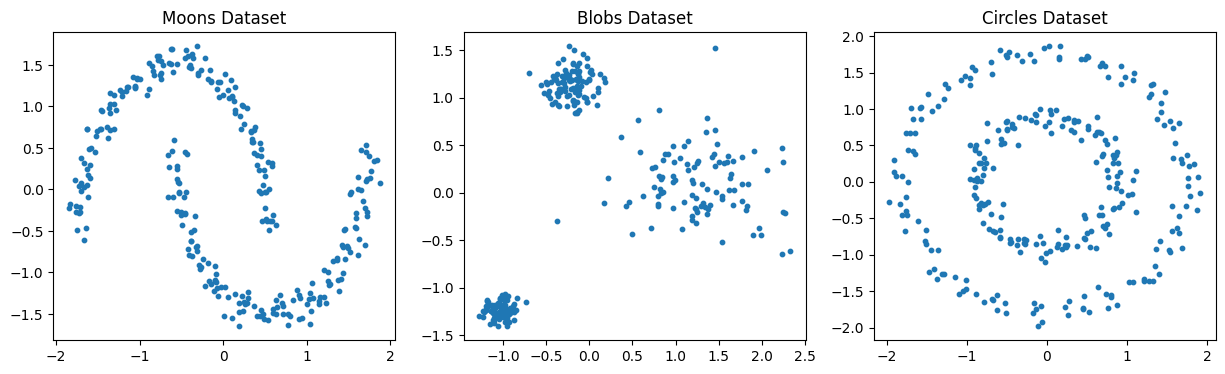

In [3]:
# Function to plot datasets
def plot_datasets(datasets, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i, (X, title) in enumerate(zip(datasets, titles)):
        axes[i].scatter(X[:, 0], X[:, 1], s=10)
        axes[i].set_title(title)
    plt.show()

# Display the datasets
datasets = [X_moons, X_blobs, X_circles]
titles = ["Moons Dataset", "Blobs Dataset", "Circles Dataset"]
plot_datasets(datasets, titles)


Step 4: Apply Clustering Algorithms
Step 4.1: Define a Function for Clustering and Plotting
Instead of repeating code, we will create a function that:

Applies k-Means, Hierarchical Clustering, and DBSCAN.
Plots the clustering results

In [1]:
import os

# Create directory if it doesn't exist
plots_folder = "../plots"
os.makedirs(plots_folder, exist_ok=True)

# Function to apply clustering and save plots
def apply_clustering_and_save(X, title, filename):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # k-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="viridis", s=10)
    axes[0].set_title(f"k-Means Clustering - {title}")

    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=3)
    hierarchical_labels = hierarchical.fit_predict(X)
    axes[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap="viridis", s=10)
    axes[1].set_title(f"Hierarchical Clustering - {title}")

    # DBSCAN Clustering
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap="viridis", s=10)
    axes[2].set_title(f"DBSCAN Clustering - {title}")

    # Save the plot
    save_path = os.path.join(plots_folder, filename)
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved: {save_path}")

    plt.close()

# Apply clustering on all datasets and save plots
datasets = [X_moons, X_blobs, X_circles]
titles = ["Moons Dataset", "Blobs Dataset", "Circles Dataset"]
filenames = ["moons_clustering.png", "blobs_clustering.png", "circles_clustering.png"]

for X, title, filename in zip(datasets, titles, filenames):
    apply_clustering_and_save(X, title, filename)


NameError: name 'X_moons' is not defined